Python Refresher 
================

------
**Deep Learning for Computer Vision**<br>
(c) Research Group CAMMA, University of Strasbourg<br>
Website: http://camma.u-strasbg.fr/
-----

### About this notebook

- **Objectives**: 
  - Use Python and the libraries Numpy, Scypy and Matplotlib
  - Perform image manipulation
  - Classify images with the nearest neighbor algorithm
  

- **Intructions**:
  - To make the best use of this notebook, read the provided instructions and code, fill in the *#TODO* blocks, and run the code.

### Warm-up

**(1)** Reminder: Notebooks can be used to run bash script commands:

In [1]:
!pwd

'pwd' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [1]:
!ls

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


**(2)** Python

Write the code for a recursive function that computes the factorial of a number:

In [11]:
def factorial(n):
    #TODO<
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
    #TODO>

Test the function:

In [12]:
factorial(5)

120

Compute the factorial of 1, 2, ..., 10 using list comprehension:

In [13]:
#TODO<
results = [factorial(i+1) for i in range(10)]
#TODO> (can be done in 1 short line)
print(results)

[1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]


**(2)** Numpy

Let's play with matrices

In [5]:
import numpy as np

In [6]:
a=np.array(range(1,36))

In [7]:
a.resize(5,7)

In [8]:
print(a)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28]
 [29 30 31 32 33 34 35]]


Extract the last line of matrix a:

In [9]:
#TODO<
print(a[-1,:])
#TODO>

[29 30 31 32 33 34 35]


Extract the 3x5 center matrix of matrix a:

In [10]:
#TODO<
print(a[1:4,1:6])
#TODO>

[[ 9 10 11 12 13]
 [16 17 18 19 20]
 [23 24 25 26 27]]


Add [2,2,2,0,-2,-2,-2] to all lines:

In [14]:
#TODO<
print(a + np.array([2,2,2,0,-2,-2,-2])) 
#TODO>

[[ 3  4  5  4  3  4  5]
 [10 11 12 11 10 11 12]
 [17 18 19 18 17 18 19]
 [24 25 26 25 24 25 26]
 [31 32 33 32 31 32 33]]


Normalize the matrix a so that all columns sum to 1:

In [43]:
#TODO<
b = a /np.sum(a, axis=0)
#TODO>

Verify the normalization:

In [44]:
b.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

Matrix multiplication:

In [45]:
np.dot(a, np.array([0,0,1,0,0,0,0]) ) #Extract the 3rd column

array([ 3, 10, 17, 24, 31])

### Using images

Import libraries:

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

Download the image if needed:

In [47]:
if 1:
  import urllib
  urllib.request.urlretrieve('https://seafile.unistra.fr/f/2d56331e39634247a0f3/?dl=1','torres.jpg')

Load image:

In [48]:
im = plt.imread('torres.jpg')

Print characteristics:

In [49]:
print('Type=',im.dtype,'  Shape=', im.shape)

Type= uint8   Shape= (1080, 1920, 3)


Display image:

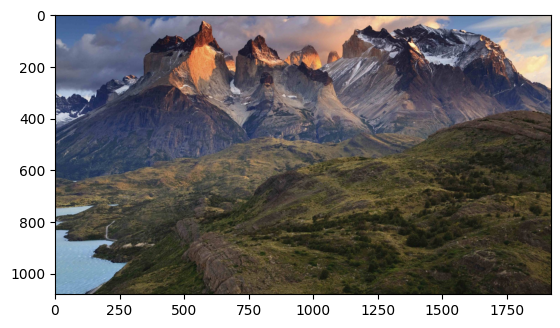

In [50]:
plt.imshow(im)

Convert your image to a single channel (the norm of each pixel in RGB space) by scanning the image with two loops to compute the result:

In [51]:
def toGrayscale(im):
    #TODO<
    l, c, _ = im.shape
    im_gray = np.zeros((l, c))
    for i in range(l):
        for j in range(c):
            im_gray[i, j] = np.linalg.norm(im[i,j])
    return im_gray
    #TODO>

Type= float64   Shape= (1080, 1920)


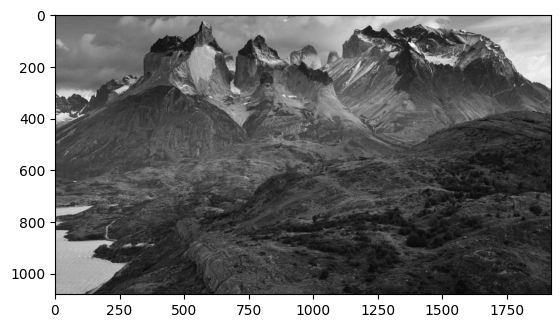

In [53]:
im2 = toGrayscale(im)
plt.imshow(im2, cmap='gray')
print('Type=',im2.dtype,'  Shape=', im2.shape)

Compute the time needed to perform this conversion using the *timeit* module:

In [58]:
start_time = timeit.default_timer()

im2 = toGrayscale(im)

end_time = timeit.default_timer()
print('Time=%.3f seconds' % (end_time - start_time) )

Time=4.472 seconds


Perform the same conversion using vectorization (no loop allowed):

In [55]:
def toGrayscale_vectorized(im):
    #TODO<
    l, c, _ = im.shape
    im_gray = np.linalg.norm(im, axis=2)
    return im_gray
    #TODO>

Time this function and display the resulting image:

In [57]:
#TODO<
start_time = timeit.default_timer()

im3 = toGrayscale_vectorized(im)

end_time = timeit.default_timer()
print('Time=%.3f seconds' % (end_time - start_time) )
#TODO>

Time=0.059 seconds


Verify that the resulting images computed by the two functions are the same:

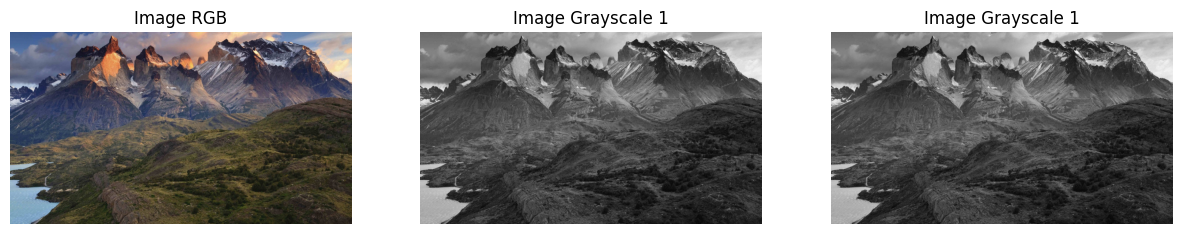

In [ ]:
#TODO< 
fig, axs = plt.subplots(1, 3, figsize=(15,10))
for ax in axs:
    ax.axis('off')
axs[0].imshow(im), axs[0].set_title('Image RGB')
axs[1].imshow(im2, cmap='gray'), axs[1].set_title('Image Grayscale 1')
axs[2].imshow(im3, cmap='gray'), axs[2].set_title('Image Grayscale 1')
plt.show()
#TODO>q

What do you conclude? --> *vectorization and broadcasting are a must, especially with a lot of data*

### Nearest Neighbor Classification

Load the MNIST dataset:

In [64]:
import pickle
import gzip

In [65]:
#Download the dataset if needed:
if 1:
  import urllib
  urllib.request.urlretrieve('https://seafile.unistra.fr/f/ea3445be9fa3473e8408/?dl=1','mnist.pkl.gz')

In [66]:
path = './' #TO ADAPT IF NEEDED
f = gzip.open(path+'mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='bytes')
f.close()

In [67]:
#%% Shuffle the data and define the data variables
X_train,y_train = train_set
X_test,y_test = test_set

inds=np.arange(0,X_train.shape[0])
np.random.shuffle(inds)
X_train,y_train = X_train[inds],y_train[inds] 

inds=np.arange(0,X_test.shape[0])
np.random.shuffle(inds)
X_test,y_test = X_test[inds],y_test[inds] 

Print the size of the dataset:

In [68]:
print(X_train.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)


What is the size of a MNIST image?

Display a few images from the dataset with their labels:

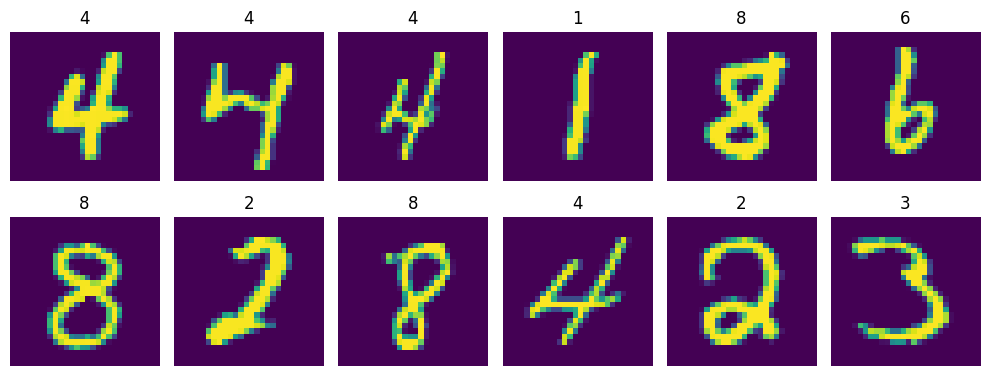

In [75]:
#TODO<
l, c = 28, 28
fig, axs = plt.subplots(2, 6, figsize=(10,4))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(X_train[i].reshape(l, c))
    ax.set_title(y_train[i])
fig.tight_layout()
#TODO>

Define a function that returns the index of the Nearest Neighbor of the image in the database (db is here X_train):

In [76]:
def find_nearest(db, img):
    #TODO<
    min_diff = np.inf
    min_idx = -1
    for idx, im_db in enumerate(db):
        diff = np.linalg.norm(img - im_db)
        if diff < min_diff:
            min_diff = diff
            min_idx = idx
    return min_idx
    #TODO>

Test this function on a few images from the test set. Display both the test image and the closest in the database:

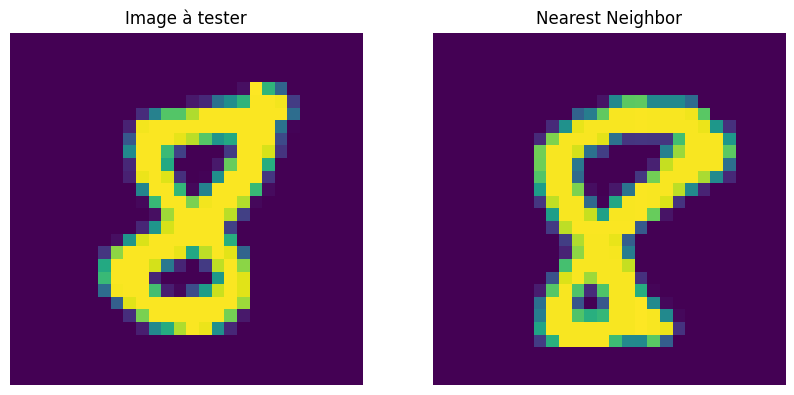

In [83]:
index = 4 #index of image to test
#TODO<
nn_idx = find_nearest(X_train, X_test[index])

_, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(X_train[index].reshape((l,c))), axs[0].set_title('Image à tester'), axs[0].axis('off')
axs[1].imshow(X_train[nn_idx].reshape((l,c))), axs[1].set_title('Nearest Neighbor'), axs[1].axis('off')
plt.show()
#TODO>

Compute the accuracy of this Nearest Neighbor approach using only the first 5000 images of the train set and the first 1000 images of the test set:

In [ ]:
nb_test_images = 1000
y_pred = np.zeros_like(y_test[:nb_test_images])

start_time = timeit.default_timer()

#TODO<
for index in range(nb_test_images):
    nn_idx = find_nearest(X_train[:5000], X_test[index])
    y_pred[index] = y_train[nn_idx]

accuracy = np.sum((y_test[:nb_test_images] == y_pred)) / nb_test_images

#TODO>

end_time = timeit.default_timer()

print('Accuracy = %.3f perc (time=%.3f sec)' % (accuracy, (end_time - start_time) ))

Accuracy = 0.929 perc (time=24.520 sec)


Plot the accuracy of the Nearest Neighbor approach as a function of the size of the training database (using only the first 1000 test images):

Text(0, 0.5, 'Accuracy')

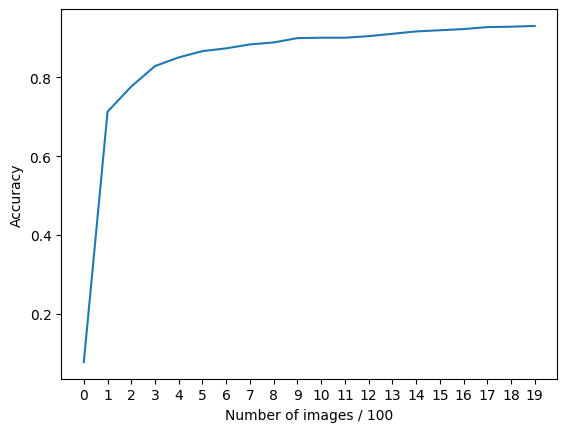

In [90]:
nb_test_images = 1000
nb_iterations = 20
accuracy = np.zeros(nb_iterations)
y_pred = np.zeros_like(y_test[:nb_test_images])

#TODO<
for n in range(nb_iterations):
    nb_train_images = 1 + n * 100
    for index in range(nb_test_images):
        nn_idx = find_nearest(X_train[:nb_train_images], X_test[index])
        y_pred[index] = y_train[nn_idx]

    accuracy[n] = np.sum((y_test[:nb_test_images] == y_pred)) / nb_test_images
#TODO>

plt.plot(accuracy)
plt.xticks([i for i in range(0,nb_iterations)])
plt.xlabel('Number of images / 100')
plt.ylabel('Accuracy')


### Bonus

Implement the k-Nearest Neighbor algorithm, which select the class label that has majority amongst the K closest neighbors :

In [116]:
dist = [(0, 4.15), (1, 12.6), (2, 6.278), (3, 22.45), (4, 12.78), (5, 64.278), (6,3.25)]
k = 3
labels = [1, 0, 3, 1, 2, 2, 3]
dist.sort(key= lambda tup: tup[1]) # On trie sur les distances et pas sur les indices
print("dist = ", dist)
knn = dist[:k] # On prend les k-premiers, sous la forme (idx, dist)
print("knn = ", knn)
idx = [ind for (ind, dist) in knn] # On garde uniquement les indices
print("idx = ", idx)
labs = [labels[i] for i in idx]
print("labs = ", labs)
prediction = np.argmax(np.bincount(labs))
print("prediction = ", prediction)



dist =  [(6, 3.25), (0, 4.15), (2, 6.278), (1, 12.6), (4, 12.78), (3, 22.45), (5, 64.278)]
knn =  [(6, 3.25), (0, 4.15), (2, 6.278)]
idx =  [6, 0, 2]
labs =  [3, 1, 3]
prediction =  3


In [117]:
def find_k_nearest_neighbors(db, img, k=3):
    #TODO<
    dist = [(i, np.linalg.norm(img - img_train)) for i, img_train in enumerate(db)]
    dist.sort(key= lambda tup: tup[1]) # On trie sur les distances et pas sur les indices
    knn = dist[:k] # On prend les k-premiers, sous la forme (idx, dist)
    return knn
    #TODO>

#%% Predict the class label using majority vote in k neighbors
def kpredict(db, lab, img, k=3):
    #TODO<
    knn = find_k_nearest_neighbors(db, img, k)
    idx = [ind for (ind, dist) in knn] # On garde uniquement les indices
    labs = [lab[i] for i in idx]
    prediction = np.argmax(np.bincount(labs))
    return prediction
    #TODO>


Plot the accuracy of the k-Nearest Neighbor (for k=5) approach as a function of the size of the training database (using only the first 1000 test images):

Text(0, 0.5, 'Accuracy')

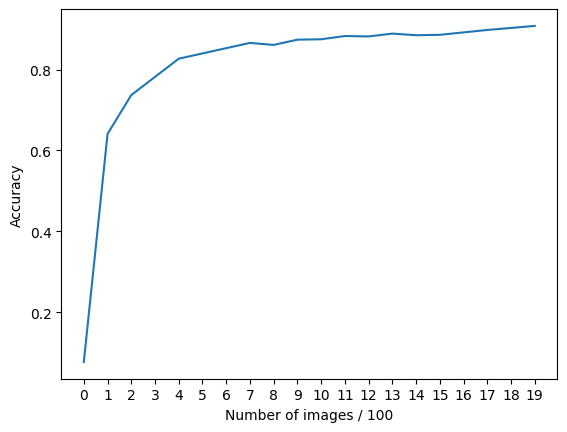

In [120]:
nb_test_images = 1000

start_time = timeit.default_timer()

#TODO<

for n in range(nb_iterations):
    nb_train_images = 1 + n * 100
    for index in range(nb_test_images):
        y_pred[index] = kpredict(X_train[:nb_train_images], y_train, X_test[index], k=5)

    accuracy[n] = np.sum((y_test[:nb_test_images] == y_pred)) / nb_test_images
#TODO>

end_time = timeit.default_timer()

plt.plot(accuracy)
plt.xticks([i for i in range(0,nb_iterations)])
plt.xlabel('Number of images / 100')
plt.ylabel('Accuracy')


-----

### THE END

-----